
The objective is to train several models and evaluate how effectively they predict instances of fraud using data from the file `fraud_data.csv` (from kaggle).
 
Each row corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 

 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (accuracy_score,recall_score, recall_score, precision_score, accuracy_score,
precision_recall_curve, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

%matplotlib inline

In [32]:
df = pd.read_csv('fraud_data.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


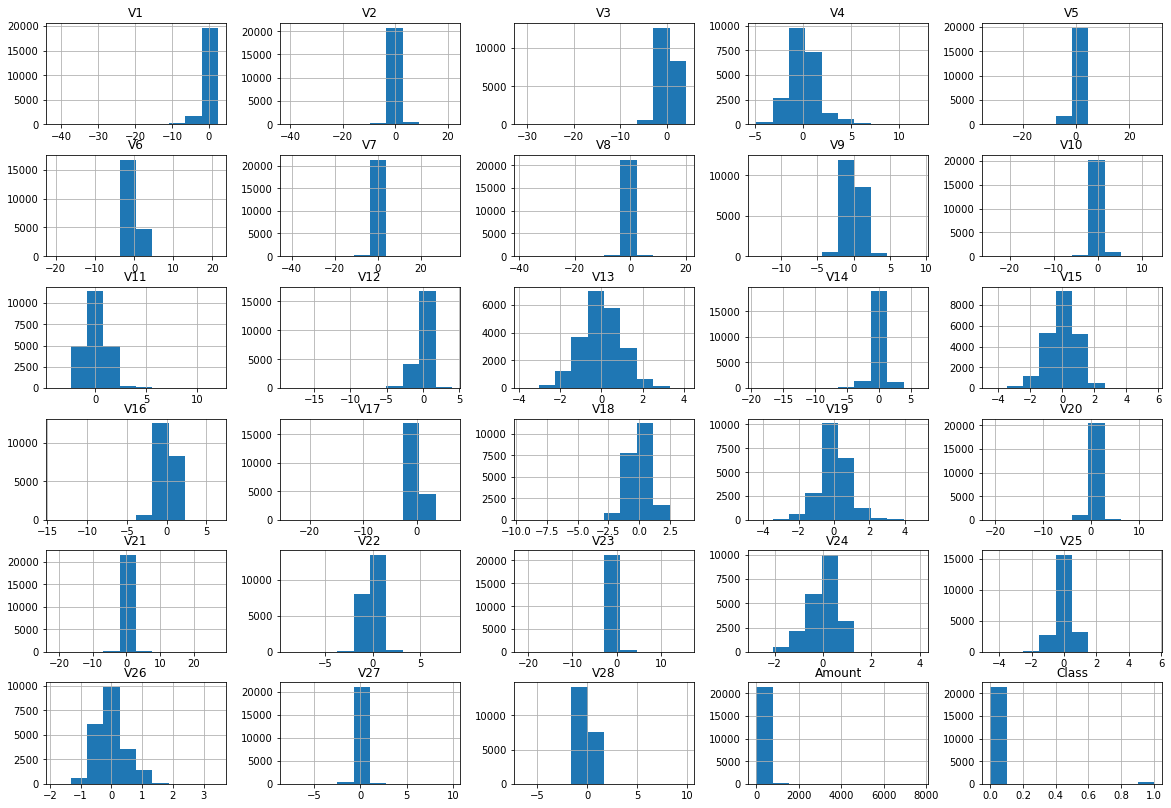

In [33]:
_ = df.hist(figsize=(20,14))

This is the percentage of the observations in the dataset that are instances of fraud


In [34]:
print(f'Dataframe shape {df.shape}')
values = df['Class'].value_counts()

print(f'Instances of fraud: {values[1]/(values[0]+values[1]):.3f}')

Dataframe shape (21693, 30)
Instances of fraud: 0.016


In [35]:

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Dummy classifier that classifies everything as the majority class of the training data. Then see accuracy and recall.


In [36]:

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_dummy_predictions = dummy_majority.predict(X_test)

print(f'Accuracy {accuracy_score(y_test, y_dummy_predictions):.3f}')
print(f'Recall score {recall_score(y_test, y_dummy_predictions):.3f}')


Accuracy 0.985
Recall score 0.000



Now with a SVC classifer using the default parameters. Note the accuracy, recall, and precision.

In [37]:

svm = SVC().fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

print(f'Accuracy score {accuracy_score(y_test, svm_predicted):.3f}')
print(f'Recall score {recall_score(y_test, svm_predicted):.3f}')
print(f'Precision score {precision_score(y_test, svm_predicted):.3f}')


Accuracy score 0.990
Recall score 0.350
Precision score 0.933



Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`. Showing the confusion matrix when using a threshold of -220 on the decision function. 


(16269, 29) (5424,)
Accuracy score 0.993
Recall score 0.825
Precision score 0.733


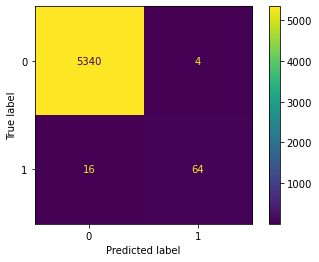

In [45]:

svm = SVC(C=1e9, gamma=1e-07, random_state=0).fit(X_train, y_train)
svm_pred_threshold = svm.decision_function(X_test) > -220

confusion = confusion_matrix(y_test, svm_pred_threshold)

print(X_train.shape, y_test.shape)
print(f'Accuracy score {accuracy_score(y_test, svm_pred_threshold):.3f}')
print(f'Recall score {recall_score(y_test, svm_pred_threshold):.3f}')
print(f'Precision score {precision_score(y_test, svm_pred_threshold):.3f}')

ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test)


Training now a logisitic regression classifier with default parameters.

Creating a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Text(0, 0.5, 'Recall')

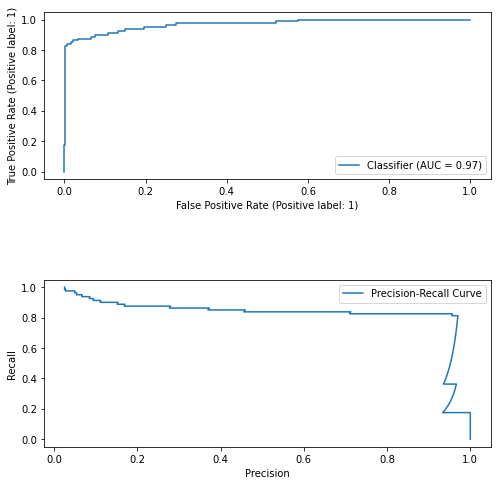

In [39]:

lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)

fig, axes = plt.subplots(2,1, figsize=(8,8))
plt.subplots_adjust(hspace=.6)

RocCurveDisplay.from_predictions(y_test, y_scores_lr, ax=axes[0])

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
axes[1].plot(precision, recall, label='Precision-Recall Curve')
axes[1].legend()
axes[1].set_xlabel('Precision')
axes[1].set_ylabel('Recall')   


Performing a grid search over the following parameters for a Logisitic Regression classifier, using recall for scoring and the default cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

In [40]:
parameters = {'penalty': ['l1','l2'], 'C':[0.01, 0.1, 1, 10, 100]}   

logi = LogisticRegression(max_iter=5000)
clf = GridSearchCV(estimator=LogisticRegression(solver='liblinear', max_iter=5000), 
                   scoring='recall', param_grid=parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='recall')

In [41]:
pd.DataFrame(clf.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.038894,0.001795,0.003189,0.000450,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.727273,0.654545,0.763636,0.714286,0.618182,0.695584,0.052269,10
1,0.081835,0.004157,0.002935,0.000146,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.818182,0.800000,0.781818,0.785714,0.672727,0.771688,0.051100,9
2,0.049788,0.002432,0.002906,0.000128,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.781818,0.836364,0.890909,0.821429,0.709091,0.807922,0.060543,3
3,0.153953,0.009418,0.003042,0.000210,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.800000,0.836364,0.890909,0.821429,0.709091,0.811558,0.059401,1
4,0.126904,0.027493,0.003240,0.000454,1,l1,"{'C': 1, 'penalty': 'l1'}",0.781818,0.836364,0.890909,0.821429,0.690909,0.804286,0.066612,4


In [42]:

scores = clf.cv_results_['mean_test_score']


[0.69558442 0.77168831 0.80792208 0.81155844 0.80428571 0.81149351
 0.80064935 0.80064935 0.80064935 0.80064935]


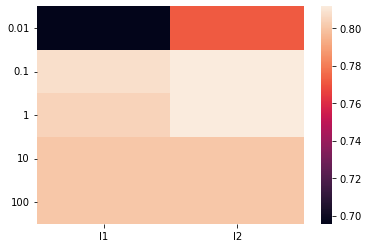

In [43]:

plt.figure()
sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
plt.yticks(rotation=0)
print(scores)
